In [3]:
#import dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
#using pandas to read the database stored in the same folder
#from sklearn import datasets
#digits = datasets.load_digits()

#data = pd.DataFrame(digits)"""

'from sklearn import datasets\ndigits = datasets.load_digits()\n\ndata = pd.DataFrame(digits)'

In [30]:
#using pandas to read the database stored in the same folder
data = pd.read_csv('mnist_train.csv')

In [31]:
#viewing column heads
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#extracting data from the dataset and viewing them up close
a = data.iloc[4,1:].values

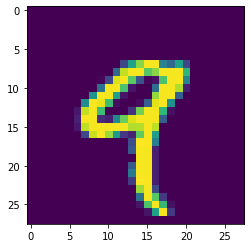

In [33]:
# reshaping the extracted data into a reasonable size
a = a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [34]:
#preparing the data
#separating labels and data values
df_x = data.iloc[:,1:]
df_y = data.iloc[:,0]

In [35]:
#creating test and train sizes/batches
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state=4)

In [36]:
#check data
y_train.head()

20379    4
53032    4
27005    7
30510    8
508      1
Name: label, dtype: int64

In [38]:
#calling the rf classifier
rf = RandomForestClassifier(n_estimators=100)

In [46]:
#fit the model
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
#prediction on test data
pred = rf.predict(x_test)

In [48]:
pred

array([2, 7, 6, ..., 6, 4, 2], dtype=int64)

In [49]:
#check prediction accuracy
s = y_test.values

#calculate number of correctly predicted values
count = 0
for i in range(len(pred)):
    if pred[i] == s[i]:
        count = count+1

In [50]:
count

11609

In [51]:
#total values that the prediction code was run on
len(pred)

12000

In [52]:
# accuracy value
11609/12000

0.9674166666666667